#### Задание 1

In [27]:
import numpy as np
import pandas as pd

In [28]:
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 6, 4

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [29]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [30]:
data = boston["data"]
data.shape

(506, 13)

In [31]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [32]:
target = boston["target"]
target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [33]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [36]:
X_train.to_pickle('X_train.pkl')
y_train.to_pickle('y_train.pkl')

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

In [38]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.694865,0.000000,2.628491,0.0,5.222922,7.485465,3.479940,0.986899,2.797502,4.012849,9.074814,3.821411,3.507672
1,0.070779,0.000000,1.182095,0.0,4.576437,8.233447,2.020726,2.113421,0.466250,1.849767,9.434213,4.325931,1.192693
2,0.003910,1.513591,0.880036,0.0,3.724947,8.511471,0.833326,3.119769,0.116563,1.831691,7.592295,3.961045,1.102572
3,0.795393,0.000000,2.628491,0.0,5.222922,8.613084,3.043606,0.949832,2.797502,4.012849,9.074814,0.027555,3.279554
4,0.081881,0.000000,1.182095,0.0,4.576437,8.082440,2.485671,1.783577,0.466250,1.849767,9.434213,4.274867,1.588380


In [39]:
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)
X_valid_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.010354,0.000000,0.588143,0.000000,4.338258,9.054816,3.007841,1.243219,0.582813,1.783488,7.457520,4.324619,1.272957
1,0.006367,1.729819,0.930864,3.874063,3.802355,9.537476,1.176670,1.915637,0.466250,1.530426,7.906769,4.339928,0.497073
2,0.011929,0.000000,4.028417,0.000000,5.180390,8.443729,3.533587,0.877624,0.466250,4.283988,9.029889,4.265682,2.544506
3,0.010338,0.000000,1.569834,0.000000,3.513138,8.559455,0.278967,2.483948,0.466250,1.837716,8.625566,4.274430,0.777292
4,0.574248,0.000000,2.628491,0.000000,6.065055,8.886873,3.283232,1.112569,2.797502,4.012849,9.074814,4.210790,2.431855


In [40]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
tsne

TSNE(learning_rate=250, random_state=42)

In [41]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


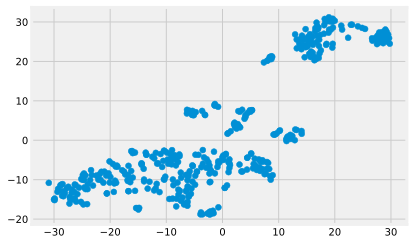

In [42]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

#### Задание 2

In [43]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmeans

KMeans(max_iter=100, n_clusters=3, random_state=42)

In [45]:
labels_train = kmeans.fit_predict(X_train)
labels_train.shape

(404,)

In [46]:
pd.value_counts(labels_train)

0    297
1     76
2     31
dtype: int64

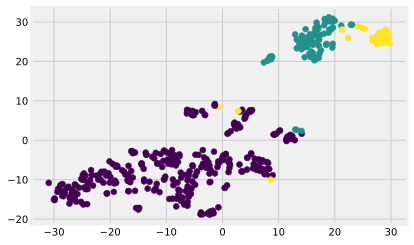

In [47]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [48]:
y_train.mean()

price    22.796535
dtype: float64

In [49]:
y_train[labels_train == 0].mean()

price    25.168687
dtype: float64

In [50]:
y_train[labels_train == 1].mean()

price    17.442105
dtype: float64

In [51]:
y_train[labels_train == 2].mean()

price    13.196774
dtype: float64

In [52]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.40486282828282827
Кластер 1: 11.745661842105262
Кластер 2: 14.360380322580646
